## 1.4 신경망으로 문제를 풀다

### spiral dataset

In [1]:
import sys #부모 디렉터리의 파일을 가져올 수 있는 기능

sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape) # (300, 2)
print('t', t.shape) # (300, 3)

x (300, 2)
t (300, 3)


데이터의 입력은 2차원이고 이에 대한 클래스 분류는 3가지이다.

### 1.4.2 신경망 구현

In [4]:
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 가중치의 편향 초기화화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        #계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        #모든 가중치와 기울기를 리스트에 모으기
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

### 1.4.3 학습용 코드


In [6]:
"""
import sys
sys.path.append('..')
import numpy as np
sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt
"""
from common.optimizer import SGD

# 1. 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    #데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 4. 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 5. 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d | 반복 %d / %d | 손실 %.2f'%(epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0 # 10번의 학습과정 후 초기화

| 에폭 1 | 반복 10 / 10 | 손실 1.13
| 에폭 2 | 반복 10 / 10 | 손실 1.13
| 에폭 3 | 반복 10 / 10 | 손실 1.12
| 에폭 4 | 반복 10 / 10 | 손실 1.12
| 에폭 5 | 반복 10 / 10 | 손실 1.11
| 에폭 6 | 반복 10 / 10 | 손실 1.14
| 에폭 7 | 반복 10 / 10 | 손실 1.16
| 에폭 8 | 반복 10 / 10 | 손실 1.11
| 에폭 9 | 반복 10 / 10 | 손실 1.12
| 에폭 10 | 반복 10 / 10 | 손실 1.13
| 에폭 11 | 반복 10 / 10 | 손실 1.12
| 에폭 12 | 반복 10 / 10 | 손실 1.11
| 에폭 13 | 반복 10 / 10 | 손실 1.09
| 에폭 14 | 반복 10 / 10 | 손실 1.08
| 에폭 15 | 반복 10 / 10 | 손실 1.04
| 에폭 16 | 반복 10 / 10 | 손실 1.03
| 에폭 17 | 반복 10 / 10 | 손실 0.96
| 에폭 18 | 반복 10 / 10 | 손실 0.92
| 에폭 19 | 반복 10 / 10 | 손실 0.92
| 에폭 20 | 반복 10 / 10 | 손실 0.87
| 에폭 21 | 반복 10 / 10 | 손실 0.85
| 에폭 22 | 반복 10 / 10 | 손실 0.82
| 에폭 23 | 반복 10 / 10 | 손실 0.79
| 에폭 24 | 반복 10 / 10 | 손실 0.78
| 에폭 25 | 반복 10 / 10 | 손실 0.82
| 에폭 26 | 반복 10 / 10 | 손실 0.78
| 에폭 27 | 반복 10 / 10 | 손실 0.76
| 에폭 28 | 반복 10 / 10 | 손실 0.76
| 에폭 29 | 반복 10 / 10 | 손실 0.78
| 에폭 30 | 반복 10 / 10 | 손실 0.75
| 에폭 31 | 반복 10 / 10 | 손실 0.78
| 에폭 32 | 반복 10 / 10 | 손실 0.77
| 에폭 33 | 반복 10 /

![learing_result_graph](../deep_learning_2_images/fig%201-32.png)
![learing_result_graph2](../deep_learning_2_images/fig%201-33.png)

### 1.4.4 Trainer 클래스

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 0.17
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 0.09
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.09
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.10
| 에폭 25 |  반복 1 / 10 | 시간

C:\Users\fxuvh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\fxuvh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\fxuvh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\fxuvh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\fxuvh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\fxuvh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48373 missing from cur

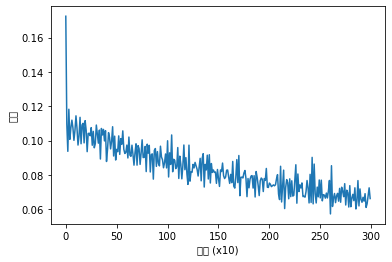

In [7]:
# 위 코드를 클래스로 구현된 버전을 통해서 모델 학습을 진행하기

from common.trainer import Trainer

"""
# 1. 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)
"""

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()
